In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json
import boto3
import sagemaker
from sagemaker import get_execution_role

import pandas as pd
import numpy as np

from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

from sagemaker.feature_store.feature_group import FeatureGroup

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import os
import io

import psycopg2
import gc

import pandas as pd
import numpy as np

from datetime import datetime

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter, WeibullAFTFitter
from sklearn.pipeline import Pipeline
from lifelines.utils.sklearn_adapter import sklearn_adapter


from sklearn.preprocessing import StandardScaler, Normalizer, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sagemaker.feature_store.feature_group import FeatureGroup


from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn import set_config

# import time
# set_config(display='diagram') 


import requests
from requests.auth import HTTPBasicAuth


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_fscore_support, roc_curve, precision_recall_curve


%matplotlib inline

In [3]:
df = pd.read_csv('ma_ltv_merged.csv')

/Users/jawhar/opt/anaconda3/envs/ma-dc/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,application_id,owner_email,application_name,policy_id,owner_id,owner_phone,sk_submitted_date,sk_owner_gender,sk_date_of_birth,app_zip_code,pol_zip_code,parent_application_id,sk_referral_flag,bk_product_type,carrier,bk_gender,lead_id,first_name,last_name,submitted_month,submitted_year,area_code,age,age_range,jrn_state,jrn_boberdoo_amount,jrn_boberdoo_source,jrn_boberdoo_lead_type,jrn_date,jrn_event_date,jrn_firstparty,jrn_is_first_party,jrn_error,jrn_year,jrn_month,jrn_day,jrn_hour,jrn_request_city,jrn_request_state,jrn_request_smoker,jrn_request_gender,jrn_response_audit_authentic,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_latitude,zcta_longitude,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_mrkt_leader,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,z

In [5]:
df['LTV'] = df['post_raw_LTV calculated']

In [6]:
df = df.drop(['application_id',  'owner_email',  'application_name', 'policy_id',  
            'owner_id', 'parent_application_id',
            'bk_product_type',  'carrier',  'first_name',  'last_name',  
            'post_raw_application_id','post_raw_medicare_number','post_raw_policy_id','owner_phone', 
            'sk_referral_flag', 'lead_id', 'zcta_latitude', 'zcta_longitude', 'tu_SUB_USER_ID',
              'tu_ACCOUNT','post_raw_model_predicted_duration', 'tu_GROUP_ID','post_raw_LTV calculated'], axis = 1)

In [7]:
# Define numeric and categorical features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

### Decisions
Lead id -> drop or not

In [8]:
numeric_columns

['sk_owner_gender',
 'app_zip_code',
 'submitted_month',
 'submitted_year',
 'area_code',
 'age',
 'jrn_boberdoo_amount',
 'jrn_date',
 'jrn_year',
 'jrn_month',
 'jrn_day',
 'jrn_hour',
 'jrn_response_audit_authentic',
 'jrn_response_audit_consumer_five_minutes',
 'jrn_response_audit_consumer_hour',
 'jrn_response_audit_consumer_twelve_hours',
 'jrn_response_audit_consumer_twelve_consumer_day',
 'jrn_response_audit_consumer_week',
 'jrn_response_audit_data_integrity',
 'jrn_response_audit_fields_email',
 'jrn_response_audit_fields_f_name',
 'jrn_response_audit_fields_l_name',
 'jrn_response_audit_fields_phone1',
 'jrn_response_audit_fields_city',
 'jrn_response_audit_fields_state',
 'jrn_response_audit_fields_address1',
 'jrn_response_audit_device_five_minutes',
 'jrn_response_audit_device_hour',
 'jrn_response_audit_device_twelve_hours',
 'jrn_response_audit_device_day',
 'jrn_response_audit_device_week',
 'jrn_response_audit_consumer_dupe_check',
 'jrn_response_audit_entity_value',


In [9]:
for cat in categorical_columns:
    print(df[cat].value_counts())

2021-12-07    797
2021-12-06    618
2021-12-01    309
2021-11-30    307
2021-12-03    291
             ... 
2021-07-31      1
2021-07-24      1
2021-01-28      1
2021-04-23      1
2021-10-09      1
Name: sk_submitted_date, Length: 509, dtype: int64
1957-02-19    16
1956-09-23    12
1946-10-06    12
1954-10-13    12
1955-08-18    11
              ..
1957-10-02     1
1925-07-04     1
1936-08-04     1
1943-09-11     1
1951-01-10     1
Name: sk_date_of_birth, Length: 10158, dtype: int64
None     12652
60628        9
63136        8
39702        7
19140        6
         ...  
46142        1
75090        1
45410        1
33484        1
45154        1
Name: pol_zip_code, Length: 3499, dtype: int64
F    11819
M     8900
Name: bk_gender, dtype: int64
65 to 75        10201
75 to 85         5203
Less than 65     3699
More than 85     2030
Name: age_range, dtype: int64
FL    507
AR    468
TX    459
PA    388
VA    209
GA    199
CA    198
NC    190
MS    152
IL    149
MI    134
OH    132
TN    128


In [10]:
for cat in categorical_columns:
    print(df[cat].nunique(),cat)

509 sk_submitted_date
10158 sk_date_of_birth
3499 pol_zip_code
2 bk_gender
4 age_range
42 jrn_state
80 jrn_boberdoo_source
3 jrn_boberdoo_lead_type
3203 jrn_event_date
2 jrn_firstparty
2 jrn_is_first_party
1 jrn_error
1937 jrn_request_city
39 jrn_request_state
1 jrn_request_smoker
4 jrn_request_gender
8 zcta_cms_mapd_mrkt_leader
3953 tu_CITY
17 tu_DEMO_OCCUPATION_FIRST


### Keep state instead of zipcode
*Dont take year of submitted
*tsne for zip v alues
*day of the week for jrn_date and submitted


#### Categorical conversion

In [11]:
#Max nunique cats: sk_submitted_date, sk_date_of_birth, pol_zip_code, 
#jrn_event_date,jrn_request_city, tu_CITY, 


df['sk_submitted_date'] = pd.to_datetime(df['sk_submitted_date'])
df['jrn_event_date'] = pd.to_datetime(df['jrn_event_date'])



#### Cat expansion

In [12]:
df['submitted_day'] = df.sk_submitted_date.dt.day
df['jrn_event_day'] = df.jrn_event_date.dt.day
df['jrn_event_month'] = df.jrn_event_date.dt.month
df['jrn_event_year'] = df.jrn_event_date.dt.year

##### Drop after cat conversion

In [13]:
df = df.drop(['sk_submitted_date',  'jrn_event_date',  
              'sk_date_of_birth', 'jrn_request_city',  
            'tu_CITY','jrn_date'], axis = 1)

In [14]:
# Define numeric and categorical features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
categorical_columns

['pol_zip_code',
 'bk_gender',
 'age_range',
 'jrn_state',
 'jrn_boberdoo_source',
 'jrn_boberdoo_lead_type',
 'jrn_firstparty',
 'jrn_is_first_party',
 'jrn_error',
 'jrn_request_state',
 'jrn_request_smoker',
 'jrn_request_gender',
 'zcta_cms_mapd_mrkt_leader',
 'tu_DEMO_OCCUPATION_FIRST']

In [16]:
for cat in categorical_columns:
    print(df[cat].nunique(),cat)

3499 pol_zip_code
2 bk_gender
4 age_range
42 jrn_state
80 jrn_boberdoo_source
3 jrn_boberdoo_lead_type
2 jrn_firstparty
2 jrn_is_first_party
1 jrn_error
39 jrn_request_state
1 jrn_request_smoker
4 jrn_request_gender
8 zcta_cms_mapd_mrkt_leader
17 tu_DEMO_OCCUPATION_FIRST


In [17]:
df[df.columns[df.columns.str.contains("zip|ZIP")]]

,app_zip_code,pol_zip_code,tu_ZIP
0,32507.0,None,NaN
1,24422.0,None,244229614.0
2,34221.0,None,NaN
3,70737.0,NaN,70737.0
4,78102.0,None,NaN
...,...,...,...
21128,79414.0,None,NaN
21129,76115.0,None,NaN
21130,77053.0,77053,NaN
21131,29687.0,None,296873739.0


In [18]:
df['zip']= df['app_zip_code']

In [19]:
numeric_columns

['sk_owner_gender',
 'app_zip_code',
 'submitted_month',
 'submitted_year',
 'area_code',
 'age',
 'jrn_boberdoo_amount',
 'jrn_year',
 'jrn_month',
 'jrn_day',
 'jrn_hour',
 'jrn_response_audit_authentic',
 'jrn_response_audit_consumer_five_minutes',
 'jrn_response_audit_consumer_hour',
 'jrn_response_audit_consumer_twelve_hours',
 'jrn_response_audit_consumer_twelve_consumer_day',
 'jrn_response_audit_consumer_week',
 'jrn_response_audit_data_integrity',
 'jrn_response_audit_fields_email',
 'jrn_response_audit_fields_f_name',
 'jrn_response_audit_fields_l_name',
 'jrn_response_audit_fields_phone1',
 'jrn_response_audit_fields_city',
 'jrn_response_audit_fields_state',
 'jrn_response_audit_fields_address1',
 'jrn_response_audit_device_five_minutes',
 'jrn_response_audit_device_hour',
 'jrn_response_audit_device_twelve_hours',
 'jrn_response_audit_device_day',
 'jrn_response_audit_device_week',
 'jrn_response_audit_consumer_dupe_check',
 'jrn_response_audit_entity_value',
 'jrn_respons

In [20]:
df = df.drop(['pol_zip_code',  'app_zip_code',  
              'tu_ZIP',], axis = 1)

In [21]:
# Define numeric and categorical features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [22]:
df[numeric_columns]


,sk_owner_gender,submitted_month,submitted_year,area_code,age,jrn_boberdoo_amount,jrn_year,jrn_month,jrn_day,jrn_hour,jrn_response_audit_authentic,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,zcta_usc_population_density_per_km2,zcta_usc_sex_ratio,zcta_usc_total_population,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_CONTACT_SCORE,tu_CREDIT_SCORE,LTV,submitted_day,jrn_event_day,jrn_event_month,jrn_event_year,zip
0,10004,11,2021,850.0,84,NaN,NaN,NaN,NaN,N

In [23]:
df[categorical_columns]

,bk_gender,age_range,jrn_state,jrn_boberdoo_source,jrn_boberdoo_lead_type,jrn_firstparty,jrn_is_first_party,jrn_error,jrn_request_state,jrn_request_smoker,jrn_request_gender,zcta_cms_mapd_mrkt_leader,tu_DEMO_OCCUPATION_FIRST
0,F,75 to 85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uhc,NaN
1,F,Less than 65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uhc,NaN
2,M,65 to 75,FL,500,Exclusive,True,True,no,FL,NaN,m,humana,NaN
3,F,Less than 65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,humana,NaN
4,F,65 to 75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uhc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21128,F,65 to 75,PA,100,Unmatched,True,True,no,PA,NaN,f,uhc,NaN
21129,M,65 to 75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uhc,NaN
21130,F,75 to 85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uhc,NaN
21131,F,More than 85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,humana,professional


In [24]:
to_one_hot = ['sk_owner_gender', 'submitted_month', 'submitted_year', 'jrn_event_day',
              'area_code', 'jrn_month', 'jrn_day', 'jrn_hour', 'submitted_day',
              'jrn_response_audit_authentic', 'bk_gender', 'age_range', 'jrn_state',
              'jrn_boberdoo_source','jrn_boberdoo_lead_type', 'jrn_firstparty',
              'jrn_is_first_party', 'jrn_error', 'jrn_request_state', 'jrn_request_smoker',
              'jrn_request_gender', 'zcta_cms_mapd_mrkt_leader', 'tu_DEMO_OCCUPATION_FIRST']

In [25]:
for num in numeric_columns:
    print(df[num].nunique(),num)

3 sk_owner_gender
12 submitted_month
4 submitted_year
325 area_code
92 age
741 jrn_boberdoo_amount
3 jrn_year
12 jrn_month
31 jrn_day
24 jrn_hour
1 jrn_response_audit_authentic
7 jrn_response_audit_consumer_five_minutes
11 jrn_response_audit_consumer_hour
16 jrn_response_audit_consumer_twelve_hours
22 jrn_response_audit_consumer_twelve_consumer_day
30 jrn_response_audit_consumer_week
3 jrn_response_audit_data_integrity
3 jrn_response_audit_fields_email
3 jrn_response_audit_fields_f_name
3 jrn_response_audit_fields_l_name
3 jrn_response_audit_fields_phone1
3 jrn_response_audit_fields_city
3 jrn_response_audit_fields_state
3 jrn_response_audit_fields_address1
5 jrn_response_audit_device_five_minutes
12 jrn_response_audit_device_hour
18 jrn_response_audit_device_twelve_hours
28 jrn_response_audit_device_day
29 jrn_response_audit_device_week
7 jrn_response_audit_consumer_dupe_check
1 jrn_response_audit_entity_value
10 jrn_response_audit_ip_five_minutes
28 jrn_response_audit_ip_hour
31 jrn_

In [26]:
for cat in categorical_columns:
    print(df[cat].nunique(),cat)

2 bk_gender
4 age_range
42 jrn_state
80 jrn_boberdoo_source
3 jrn_boberdoo_lead_type
2 jrn_firstparty
2 jrn_is_first_party
1 jrn_error
39 jrn_request_state
1 jrn_request_smoker
4 jrn_request_gender
8 zcta_cms_mapd_mrkt_leader
17 tu_DEMO_OCCUPATION_FIRST


In [27]:
data = pd.get_dummies(df, columns = to_one_hot)
data

,age,jrn_boberdoo_amount,jrn_year,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,zcta_usc_population_density_per_km2,zcta_usc_sex_ratio,zcta_usc_total_population,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_CONTACT_SCORE,tu_CREDIT_SCORE,LTV,jrn_event_month,jrn_event_year,zip,sk_owner_gender_10000,sk_owner_gender_10004,sk_owner_gender_10008,submitted_month_1,submitted_month_2,submitted_month_3,submitted_month_4,submitted_month_5,submitted_month_6,submitted

In [28]:
# final_dat = pd.concat([data, df], axis=1)
# final_dat

In [29]:
# final_dat[categorical_columns]

In [30]:
# final_dat = final_dat.drop(to_one_hot , axis = 1)

In [31]:
# final_dat

In [32]:
# Define numeric and categorical features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [33]:
data

,age,jrn_boberdoo_amount,jrn_year,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,zcta_usc_population_density_per_km2,zcta_usc_sex_ratio,zcta_usc_total_population,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_CONTACT_SCORE,tu_CREDIT_SCORE,LTV,jrn_event_month,jrn_event_year,zip,sk_owner_gender_10000,sk_owner_gender_10004,sk_owner_gender_10008,submitted_month_1,submitted_month_2,submitted_month_3,submitted_month_4,submitted_month_5,submitted_month_6,submitted

In [34]:
# df

In [35]:
y = data['LTV']

In [36]:
X = data.drop('LTV' , axis = 1)

In [37]:
X

,age,jrn_boberdoo_amount,jrn_year,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,zcta_usc_population_density_per_km2,zcta_usc_sex_ratio,zcta_usc_total_population,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_CONTACT_SCORE,tu_CREDIT_SCORE,jrn_event_month,jrn_event_year,zip,sk_owner_gender_10000,sk_owner_gender_10004,sk_owner_gender_10008,submitted_month_1,submitted_month_2,submitted_month_3,submitted_month_4,submitted_month_5,submitted_month_6,submitted_mon

In [38]:
# y = y.iloc[: , 1:]
y = y.fillna(0)
y


0        996.250000
1          0.000000
2        946.083333
3          0.000000
4          0.000000
            ...    
21128      0.000000
21129    975.666667
21130    954.000000
21131      0.000000
21132      0.000000
Name: LTV, Length: 21133, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.30)

<AxesSubplot:xlabel='LTV', ylabel='Count'>

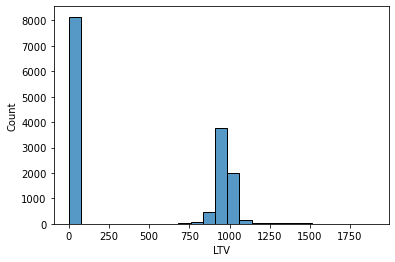

In [40]:
sns.histplot(y_train)

In [41]:
# X = X.loc[:,~X.columns.duplicated()]
# #

In [42]:
# duplicate_columns = X.columns[X.columns.duplicated()]
# duplicate_columns

In [43]:
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
# enable for cat features=> enable_categorical=True


model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
y

0        996.250000
1          0.000000
2        946.083333
3          0.000000
4          0.000000
            ...    
21128      0.000000
21129    975.666667
21130    954.000000
21131      0.000000
21132      0.000000
Name: LTV, Length: 21133, dtype: float64

In [45]:
# data.to_csv('MA_Data_cleaned.csv')

In [46]:
preds = model.predict(X_test)

<AxesSubplot:ylabel='Count'>

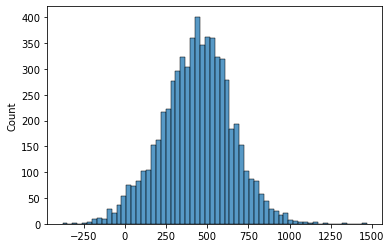

In [47]:
sns.histplot(preds)

In [48]:
import shap
shap.initjs()

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


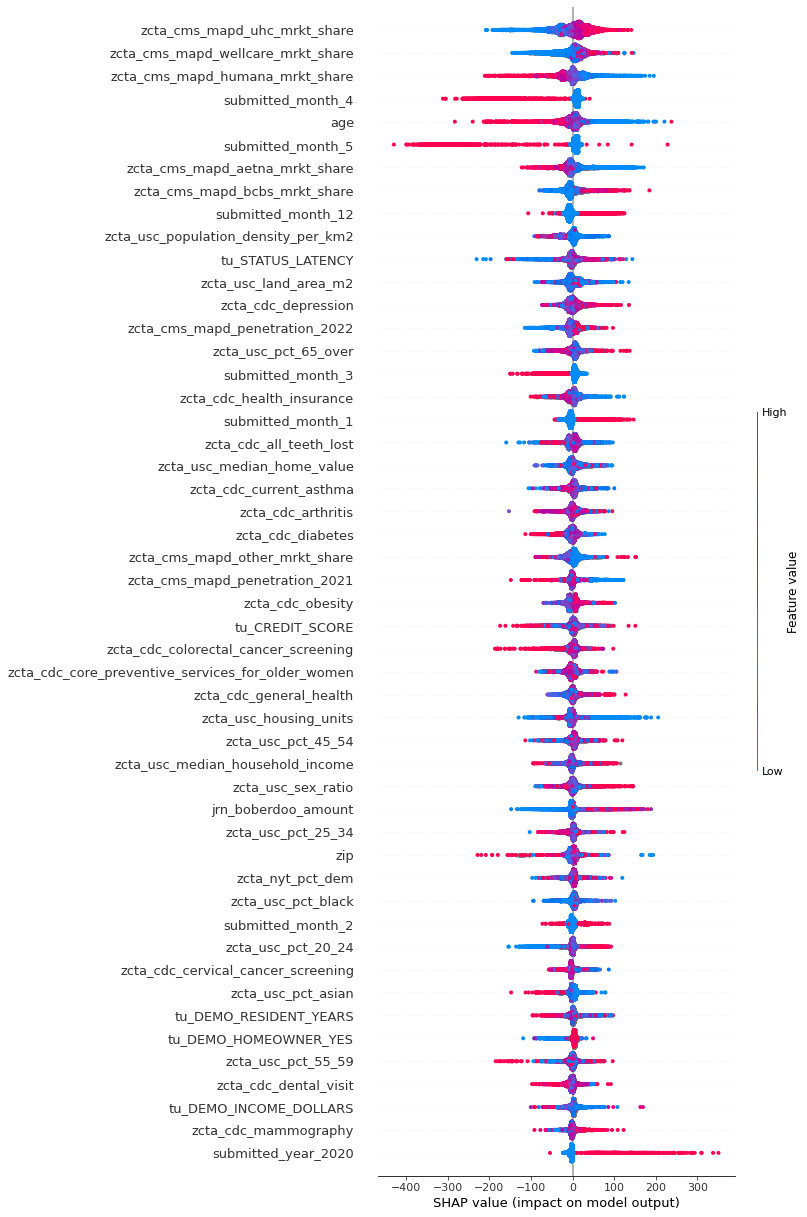

In [50]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=50)

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error

print(f'mae: {mean_absolute_error(y_test, preds)}')
print(f'median absolute error: {median_absolute_error(y_test, preds)}')
print(f'r2: {r2_score(y_test, preds)}')

mae: 431.5045754339775
median absolute error: 430.809321085612
r2: 0.034094324570537626


In [52]:
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  478.219749


In [53]:
# data.to_csv('MA_Data_cleaned.csv')

In [54]:
data

,age,jrn_boberdoo_amount,jrn_year,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zcta_cdc_all_teeth_lost,zcta_cdc_annual_checkup,zcta_cdc_arthritis,zcta_cdc_binge_drinking,zcta_cdc_cancer_except_skin,zcta_cdc_cervical_cancer_screening,zcta_cdc_cholesterol_screening,zcta_cdc_chronic_kidney_disease,zcta_cdc_colorectal_cancer_screening,zcta_cdc_copd,zcta_cdc_core_preventive_services_for_older_men,zcta_cdc_core_preventive_services_for_older_women,zcta_cdc_coronary_heart_disease,zcta_cdc_current_asthma,zcta_cdc_current_smoking,zcta_cdc_dental_visit,zcta_cdc_depression,zcta_cdc_diabetes,zcta_cdc_general_health,zcta_cdc_health_insurance,zcta_cdc_high_blood_pressure,zcta_cdc_high_cholesterol,zcta_cdc_mammography,zcta_cdc_mental_health,zcta_cdc_obesity,zcta_cdc_physical_health,zcta_cdc_physical_inactivity,zcta_cdc_sleep_lt_7_hours,zcta_cdc_stroke,zcta_cdc_taking_bp_medication,zcta_cms_mapd_aetna_mrkt_share,zcta_cms_mapd_bcbs_mrkt_share,zcta_cms_mapd_cigna_mrkt_share,zcta_cms_mapd_humana_mrkt_share,zcta_cms_mapd_kaiser_mrkt_share,zcta_cms_mapd_lis_mrkt_share,zcta_cms_mapd_other_mrkt_share,zcta_cms_mapd_penetration_2021,zcta_cms_mapd_penetration_2022,zcta_cms_mapd_penetration_pct_change,zcta_cms_mapd_priority_mrkt_share,zcta_cms_mapd_uhc_mrkt_share,zcta_cms_mapd_wellcare_mrkt_share,zcta_nyt_pct_dem,zcta_nyt_pct_gop,zcta_usc_housing_units,zcta_usc_land_area_m2,zcta_usc_median_home_value,zcta_usc_median_household_income,zcta_usc_occupied_housing_units,zcta_usc_pct_20_24,zcta_usc_pct_25_34,zcta_usc_pct_35_44,zcta_usc_pct_45_54,zcta_usc_pct_55_59,zcta_usc_pct_60_64,zcta_usc_pct_65_74,zcta_usc_pct_65_over,zcta_usc_pct_american_indian_alaska_native,zcta_usc_pct_asian,zcta_usc_pct_black,zcta_usc_pct_hispanic_latino,zcta_usc_pct_native_hawaiian_pacific_islander,zcta_usc_pct_white,zcta_usc_population_density_per_km2,zcta_usc_sex_ratio,zcta_usc_total_population,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_CONTACT_SCORE,tu_CREDIT_SCORE,LTV,jrn_event_month,jrn_event_year,zip,sk_owner_gender_10000,sk_owner_gender_10004,sk_owner_gender_10008,submitted_month_1,submitted_month_2,submitted_month_3,submitted_month_4,submitted_month_5,submitted_month_6,submitted